In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
data_frame = pd.read_csv("../../TECH/AZURE/HOUSING/data/realEstateTown2.csv")

# Indexes

### creating and reseting indexes

In [13]:
data_frame.reset_index(inplace = True, drop = False)
data_frame.set_index(["city", "street"], inplace = True)
print(type(data_frame.index), data_frame.index[33])

data_frame.reset_index(inplace = True, drop = False)
data_frame.set_index("city", inplace = True)
print(type(data_frame.index), data_frame.index[33])

data_frame.reset_index(inplace = True, drop = False)
data_frame.index = range(len(data_frame))
print(type(data_frame.index), data_frame.index[33])

<class 'pandas.core.indexes.multi.MultiIndex'> ('Shoreline', '17052 4th Ave NE')
<class 'pandas.core.indexes.base.Index'> Shoreline
<class 'pandas.core.indexes.range.RangeIndex'> 33


### sorting indexes

In [ ]:
data_frame.sort_index(inplace = True, level = ["bedrooms"], ascending=[False])

In [ ]:
data_frame.head(2)

# DataFrame attributes

In [ ]:
print(
    type(data_frame.index),
    type(data_frame.columns),
    type(data_frame.values)
)

# Plotting

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
data_frame.head(2)

In [ ]:
city_mask = data_frame["city"].isin(["Seattle", "Kent", "Renton"])
bar_plot_data = data_frame[city_mask & bathrooms_mask][["city", "price"]]
bar_plot_data.groupby("city")["price"].max().plot(x = "city", y = "price", kind = "bar", figsize = (5,2))

In [24]:
data_frame["date"] = data_frame["date"].str.split(" ")
data_frame = data_frame[~data_frame["date"].isna()]
data_frame["date"] = data_frame["date"].str[0]
data_frame["date"] = data_frame["date"].str.replace("-", "")
data_frame["date"] = pd.to_datetime(data_frame["date"] , format="%Y%m%d")

In [ ]:
line_plot_dateframe = data_frame[data_frame["date"].between('2014-05-01', '2014-05-31')]
seattle_line_plot_data = data_frame[data_frame["city"] == "Seattle"][["price","date"]].sort_values("date", ascending = True)
newcastle_line_plot_data = data_frame[data_frame["city"] == "Newcastle"][["price","date"]].sort_values("date", ascending = True)
plt.figure(figsize=(8, 4))
plt.plot(seattle_line_plot_data["date"], seattle_line_plot_data["price"], label = "seattle")
plt.plot(newcastle_line_plot_data["date"], newcastle_line_plot_data["price"], label = "newcastle")
plt.legend()
plt.show()

<Axes: xlabel='sqft_living', ylabel='price'>

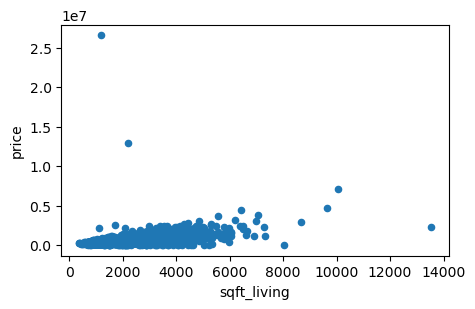

In [28]:
data_frame[["sqft_living", "price"]].plot(kind = "scatter", x = "sqft_living", y = "price", figsize = (5,3))

In [30]:
data_frame[["city"]].value_counts().head(3)

city    
Seattle     1573
Renton       293
Bellevue     286
Name: count, dtype: int64

In [ ]:
plt.figure(figsize=(5, 3))
city_mask = data_frame["city"].isin(["Renton", "Bellevue"])
hist_data = data_frame[city_mask][["price", "city"]]
hist_data[hist_data["city"] == "Renton"]["price"].hist(alpha = 0.5)
hist_data[hist_data["city"] == "Bellevue"]["price"].hist(alpha = 0.5)
plt.legend(["Renton", "Bellevue"])

array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>]], dtype=object)

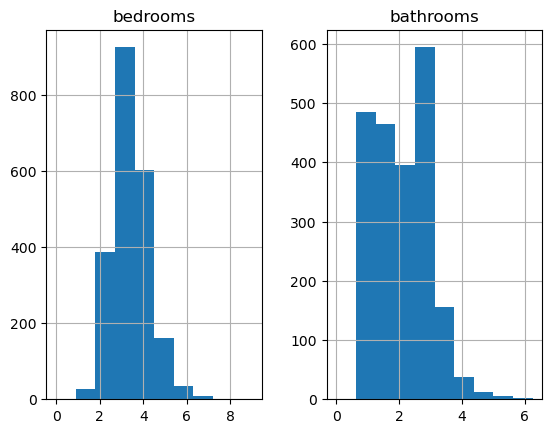

In [73]:
df = data_frame[data_frame["city"].isin(["Seattle", "Renton", "Bellevue"])][["city", "bedrooms", "bathrooms"]]
df.hist()

# Aggregating

### For groups - groupby()

In [540]:
data_frame[["city"]].value_counts().head(3)

city    
Seattle     1573
Renton       293
Bellevue     286
Name: count, dtype: int64

In [550]:
print(
    data_frame[data_frame["city"] == "Seattle"]["price"].mean(),
    data_frame[data_frame["city"] == "Algona"]["price"].mean(),
    data_frame[data_frame["city"] == "Auburn"]["price"].mean()
)

579837.4672823235 207288.0 299340.44276556815


In [544]:
data_frame.groupby("city")["price"].mean().head(3)

city
Algona                207288.000000
Auburn                299340.442766
Beaux Arts Village    745000.000000
Name: price, dtype: float64

In [554]:
def top20pct(col):
    return col.quantile(0.80)

def bottom20pct(col):
    return col.quantile(0.20)

In [558]:
data_frame.groupby(["city", "street"])["price"].agg([top20pct, bottom20pct, np.max])

C:\Users\zygmu\AppData\Local\Temp\ipykernel_19800\3828612907.py:1: FutureWarning: The provided callable <function max at 0x0000016F131F44A0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  data_frame.groupby(["city", "street"])["price"].agg([top20pct, bottom20pct, np.max])


top20pct  bottom20pct        max
city         street                                                 
Algona       130 Main St            196440.0     196440.0   196440.0
             138 Seattle Blvd S     100000.0     100000.0   100000.0
             322 9th Ave N          230000.0     230000.0   230000.0
             429 Milwaukee Blvd S   248000.0     248000.0   248000.0
             434 Pullman Ave        262000.0     262000.0   262000.0
...                                      ...          ...        ...
Woodinville  Brooktrails Trail 14   400000.0     400000.0   400000.0
Yarrow Point 4432 92nd Ave NE       899000.0     899000.0   899000.0
             4612 92nd Ave NE      1901000.0    1901000.0  1901000.0
             9033 NE 32nd St         84350.0      84350.0    84350.0
             9045 NE 40th Pl       1895000.0    1895000.0  1895000.0

[4526 rows x 3 columns]

In [564]:
data_frame.pivot_table(index = "city", columns = "country", values = "price", margins=True, fill_value=0, aggfunc=[np.max, top20pct]).head(3)

C:\Users\zygmu\AppData\Local\Temp\ipykernel_19800\3727734401.py:1: FutureWarning: The provided callable <function max at 0x0000016F131F44A0> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  data_frame.pivot_table(index = "city", columns = "country", values = "price", margins=True, fill_value=0, aggfunc=[np.max, top20pct]).head(3)
C:\Users\zygmu\AppData\Local\Temp\ipykernel_19800\3727734401.py:1: FutureWarning: The provided callable <function max at 0x0000016F131F44A0> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  data_frame.pivot_table(index = "city", columns = "country", values = "price", margins=True, fill_value=0, aggfunc=[np.max, top20pct]).head(3)
C:\Users\zygmu\AppData\Local\Temp\ipykernel_19800\3727734401.py:1: FutureWarning: Th

max            top20pct          
country                  USA       All       USA       All
city                                                      
Algona              262000.0  262000.0  250800.0  250800.0
Auburn              900000.0  900000.0  350000.0  350000.0
Beaux Arts Village  745000.0  745000.0  745000.0  745000.0

### Check whether margins = True contains means of means or means from dataset

In [582]:
data_frame_filtered = data_frame[(data_frame["city"].isin(["Seattle", "Kent"]) ) & (data_frame["bathrooms"].isin([1,2]))]
data_frame_filtered["price mln"] = data_frame_filtered["price"] / 1000000
data_frame_filtered_Kent_1 = data_frame_filtered[(data_frame_filtered["city"] == "Kent") &
(data_frame_filtered["bathrooms"] == 1)][["city", "bathrooms", "price mln"]]
data_frame_filtered_Kent_2 = data_frame_filtered[(data_frame_filtered["city"] == "Kent") & 
(data_frame_filtered["bathrooms"] == 2)][["city", "bathrooms", "price mln"]]
dfA = data_frame_filtered_Kent_1["price mln"]
dfB = data_frame_filtered_Kent_2["price mln"]
df = pd.concat([dfA, dfB])
df.mean()

C:\Users\zygmu\AppData\Local\Temp\ipykernel_19800\3350781841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame_filtered["price mln"] = data_frame_filtered["price"] / 1000000


0.9900807142857143

In [588]:
(0.194757 + 1.934528) / 2

1.0646425

In [594]:
data_frame_filtered.pivot_table(index = "city", columns= "bathrooms", values = "price mln", margins= True)

bathrooms,1.0,2.0,All
city,,,
Kent,0.194757,1.934528,0.990081
Seattle,0.383781,0.553051,0.435755
All,0.375467,0.664125,0.466502


### cumulative statistics

In [707]:
data_frame.sort_values(["date"], inplace=True)
data_frame["cumsum sqft"] = data_frame["sqft_living"].cumsum()
data_frame["cummax sqft"] = data_frame["sqft_living"].cummax()
data_frame[["date", "sqft_living", "cumsum sqft", "cummax sqft"]].head(3)

,date,sqft_living,cumsum sqft,cummax sqft
0,2014-05-02,1340,1340,1340
36,2014-05-02,800,2140,1340
37,2014-05-02,1850,3990,1850


# Indexing / Subsettins

In [618]:
grouped = data_frame.groupby(["city", "street"])["price"].agg([np.max, np.min, np.mean])
grouped.loc[ ("Algona", "322 9th Ave N") : ("Auburn", "10867-11003 SE 295th St") , ["min", "max"]  ]

C:\Users\zygmu\AppData\Local\Temp\ipykernel_19800\4087119552.py:1: FutureWarning: The provided callable <function max at 0x0000016F131F44A0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  grouped = data_frame.groupby(["city", "street"])["price"].agg([np.max, np.min, np.mean])
C:\Users\zygmu\AppData\Local\Temp\ipykernel_19800\4087119552.py:1: FutureWarning: The provided callable <function min at 0x0000016F131F45E0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  grouped = data_frame.groupby(["city", "street"])["price"].agg([np.max, np.min, np.mean])
C:\Users\zygmu\AppData\Local\Temp\ipykernel_19800\4087119552.py:1: FutureWarning: The provided callable <function mean at 0x0000016F131F4EA0> is currently using SeriesGroupBy.mean. In a future ver

min       max
city   street                                     
Algona 322 9th Ave N            230000.0  230000.0
       429 Milwaukee Blvd S     248000.0  248000.0
       434 Pullman Ave          262000.0  262000.0
Auburn 1002 Pike St NE          232603.0  232603.0
       10867-11003 SE 295th St  370000.0  370000.0

In [680]:
pivot = data_frame.pivot_table(index = "street", columns = "floors", values = "price", aggfunc=[np.min, np.max])
pivot_subset = pivot.loc[  "1 View Ln NE" : "100 24th Ave E"  ,   ("min", [1.0, 2.0])]
pivot_subset

C:\Users\zygmu\AppData\Local\Temp\ipykernel_19800\735385870.py:1: FutureWarning: The provided callable <function min at 0x0000016F131F45E0> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  pivot = data_frame.pivot_table(index = "street", columns = "floors", values = "price", aggfunc=[np.min, np.max])
C:\Users\zygmu\AppData\Local\Temp\ipykernel_19800\735385870.py:1: FutureWarning: The provided callable <function max at 0x0000016F131F44A0> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  pivot = data_frame.pivot_table(index = "street", columns = "floors", values = "price", aggfunc=[np.min, np.max])


min          
floors          1.0       2.0
street                       
1 View Ln NE    NaN  309620.0
10 W Etruria St NaN       NaN
100 20th Ave E  NaN       NaN
100 24th Ave E  NaN  460000.0

### getting the margin values

In [678]:
pivot_subset.mean(axis = "index"),pivot_subset.mean(axis = "columns")

(     floors
 min  1.0            NaN
      2.0       384810.0
 dtype: float64,
 street
 1 View Ln NE       309620.0
 10 W Etruria St         NaN
 100 20th Ave E          NaN
 100 24th Ave E     460000.0
 dtype: float64)

### .loc[]

In [686]:
data_frame.loc[1:5, ["price", "view"]]

,price,view
1,2384000.0,4
2,342000.0,0
3,420000.0,0
4,550000.0,0
5,490000.0,0


### .iloc[]

### masking

In [692]:
bathrooms_mask = ~(data_frame["bedrooms"] > 3)
bedrooms_mask = data_frame["bathrooms"] > 3

mask_and  = bedrooms_mask & bathrooms_mask
mask_or  = bedrooms_mask | bathrooms_mask

smaller_df = data_frame.loc[1:7, ["bathrooms", "bedrooms"]]

In [694]:
smaller_df

,bathrooms,bedrooms
1,2.50,5.0
2,2.00,3.0
3,2.25,3.0
4,2.50,4.0
5,1.00,2.0
6,2.00,2.0
7,2.50,4.0


# Exploring DataFrame

In [18]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2568 non-null   object 
 1   price          2568 non-null   float64
 2   bedrooms       2568 non-null   float64
 3   bathrooms      2568 non-null   float64
 4   sqft_living    2568 non-null   float64
 5   sqft_lot       2568 non-null   float64
 6   floors         2568 non-null   float64
 7   waterfront     2568 non-null   float64
 8   view           2568 non-null   float64
 9   condition      2568 non-null   float64
 10  sqft_above     2568 non-null   float64
 11  sqft_basement  2568 non-null   float64
 12  yr_built       2568 non-null   float64
 13  yr_renovated   2568 non-null   float64
 14  street         2568 non-null   object 
 15  city           2568 non-null   object 
 16  statezip       2568 non-null   object 
 17  country        2568 non-null   object 
dtypes: float

In [19]:
type(data_frame.shape)

tuple

In [20]:
data_frame.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650.0,9050.0,2.0,0.0,4.0,5.0,3370.0,280.0,1921.0,0.0,709 W Blaine St,Seattle,WA 98119,USA


In [21]:
data_frame.values[1][1]

2384000.0

In [23]:
data_frame.index

RangeIndex(start=0, stop=4600, step=1)

### applying aggregate functions on datetime column

In [ ]:
print(data_frame["date"].min(),"\n",data_frame["date"].max(),"\n",data_frame["date"].mean(),"\n",data_frame["date"].std(), "\n")

### applying aggregate functions on numerical column

In [ ]:
print(data_frame["range"].cummin(), data_frame["range"].cummax(), data_frame["range"].cumsum(), data_frame["range"].cumprod())

# Manipulating DataFrame

### Creating DataFrame

In [ ]:
columns = ["id", "category", "value"]
values = [
    [1, "A", 125151],
    [2, "A", 15151],
    [3, "B", 4141],
    [4, "B", 15151],
]
pd.DataFrame(values, columns=columns)

In [ ]:
columns = {
    "id" : [1,2,3,4],
    "class" : ["A", "A", "B", "C"],
    "value" : [313141,5115151,51616161,616161]
}
pd.DataFrame(columns)

In [ ]:
rows = [
    {"id" : 1, "class" : "A", "value" : 3131},
    {"id" : 2, "class" : "B", "value" : 3511},
    {"id" : 3, "class" : "C", "value" : 4141}
]
pd.DataFrame(rows)

### sorting

In [25]:
data_frame.sort_values(["price", "yr_built"], ascending=[False, True], inplace=True)

### create derived columns

In [73]:
data_frame["price mln"]  = data_frame[["price"]] / 1000000

In [97]:
data_frame["address"] = data_frame["street"] + "-" +  data_frame["city"] 

### dealing with Not a numbers

### replacing values

### droping duplicates

In [366]:
data_frame.drop_duplicates("city").shape

(41, 25)

In [710]:
mask_city = data_frame["city"] == "Seattle"
data_frame[mask_city].drop_duplicates(subset = ["city","floors"]).head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,cumsum sqft,cummax sqft
36,2014-05-02,440000.0,2.0,1.0,800,4850,1.0,0,0,4,800,0,1944,0,4801-4899 6th Ave NW,Seattle,WA 98107,USA,2140,1340
43,2014-05-02,439950.0,3.0,2.5,1770,2875,2.0,0,0,3,1770,0,1990,2009,4458 51st Ave SW,Seattle,WA 98116,USA,14020,2390
48,2014-05-02,445700.0,3.0,2.5,1270,1180,3.0,0,0,3,1270,0,2001,0,2640 NW 56th St,Seattle,WA 98107,USA,21560,2390


In [17]:
data_frame.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [19]:
data_frame.isna().any()

date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
street           False
city             False
statezip         False
country          False
dtype: bool

In [21]:
na_df = pd.DataFrame({
    "index": [i for i in range(8)],  
    "value": [1, 2, 3, 4, np.nan, 7, 8, 9], 
    "value-value": [1, 2, 3, 4, 5, 6, 7, 8]
})

In [25]:
na_df.isna().any()

index          False
value           True
value-value    False
dtype: bool

In [39]:
na_df.isna()

,index,value,value-value
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,True,False
5,False,False,False
6,False,False,False
7,False,False,False


In [27]:
na_df.isna().sum()

index          0
value          1
value-value    0
dtype: int64

In [29]:
na_df.replace(np.nan, -999)

,index,value,value-value
0,0,1.0,1
1,1,2.0,2
2,2,3.0,3
3,3,4.0,4
4,4,-999.0,5
5,5,7.0,6
6,6,8.0,7
7,7,9.0,8


In [883]:
na_df.dropna()

,index,value,value-value
0,0,1.0,1
1,1,2.0,2
2,2,3.0,3
3,3,4.0,4
5,5,7.0,6
6,6,8.0,7
7,7,9.0,8


In [33]:
na_df.fillna(-999)

,index,value,value-value
0,0,1.0,1
1,1,2.0,2
2,2,3.0,3
3,3,4.0,4
4,4,-999.0,5
5,5,7.0,6
6,6,8.0,7
7,7,9.0,8


In [13]:
data_frame.shape

(4600, 18)

In [15]:
data_frame.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA


<Axes: >

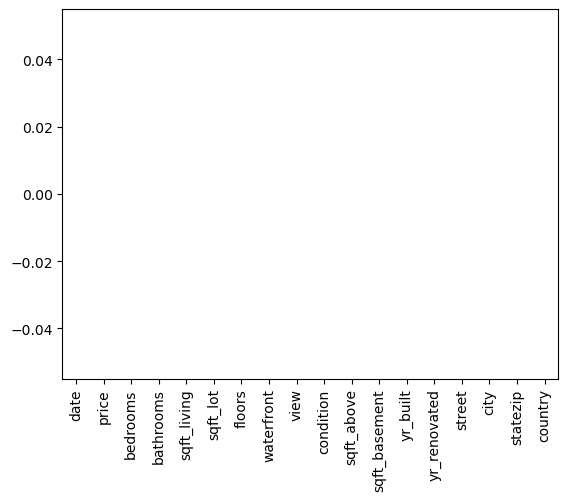

In [45]:
data_frame.isna().sum().plot(kind = "bar")